# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

## Keypoints
* As an unsupervised clustering algorithm, it does not make predictions on unseen data in the same way as supervised learning algorithms.
* It does not have an "error function" in the traditional sense as some supervised learning algorithms do. Instead, DBSCAN operates based on the concept of density connectivity and does not optimize a specific error metric.

## Parameters impact the result of cluster.
1. **Epsilon (ε | eps)**: This parameter defines the maximum distance or radius within which two points are considered neighbors. Points within this distance are considered to be part of the same cluster. Choosing an appropriate value for ε is crucial, as it determines the scale of the clusters. A small ε may result in many small clusters, while a large ε may merge multiple clusters into one.
2. **Minimum Points (min_samples)**: This parameter specifies the minimum number of points required to form a dense region (cluster).
   * Points that have at least min_samples neighbors within a distance of ε are considered core points.
   * The choice of min_samples influences the density threshold for forming clusters.
     * A higher min_samples value results in denser clusters;
     * A lower min_samples value may include more points in the clusters.

**How to choose these paramters?**
> `Silhouette Score` measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better clustering. <i>However, silhouette score may not always be applicable for DBSCAN due to its handling of noise and arbitrary cluster shapes</i>.
> `Davies-Bouldin Index` is similar index and the lower the better.</b>
See example 2 and auto determin section.

## Limitations

1. **Sensitive to Parameters**: DBSCAN requires two parameters to be set
   * epsilon (ε), which defines the radius of the neighborhood around a data point
   * min_samples, which specifies the minimum number of points required to form a dense region.<br>
   The performance of DBSCAN can be sensitive to the choice of these parameters, and finding optimal values may require some trial and error or domain knowledge.
1. **Difficulty with Varying Density**: DBSCAN struggles with datasets containing clusters of varying densities. It may fail to properly detect clusters with significantly different densities or clusters embedded within each other. Determining an appropriate epsilon value to capture such density variations can be challenging.
1. **High-Dimensional Data**: DBSCAN's performance can degrade in high-dimensional spaces due to the curse of dimensionality. In high-dimensional datasets, the notion of distance becomes less meaningful, making it difficult to define meaningful neighborhoods and density-based clusters.
1. **Sensitive to Noise and Outliers**: While DBSCAN is designed to handle noise and outliers by assigning them to the "noise" cluster, it can still be sensitive to the density of noise points and may incorrectly classify outliers as part of existing clusters if they are located near dense regions.
1. **Computational Complexity**: DBSCAN's time complexity is O(n^2) in the worst case, where n is the number of data points. This can make it inefficient for very large datasets, especially when combined with high-dimensional spaces.
1. **Memory Requirements**: DBSCAN may require substantial memory to store the distance matrix or neighborhood information, especially for large datasets. This can limit its applicability to datasets that cannot fit into memory.
1. **Cannot Discover Non-Convex Clusters**: DBSCAN is limited to discovering clusters that are dense and have relatively simple shapes (e.g., convex clusters). It may struggle to detect non-convex or irregularly shaped clusters, especially if they are separated by low-density regions.

# Examples
## Example 1 - predicate outliers

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

,Amount,Timestamp
0,109.934283,2023-01-01 00:00:00
1,97.234714,2023-01-01 01:00:00
2,112.953771,2023-01-01 02:00:00
3,130.460597,2023-01-01 03:00:00
4,95.316933,2023-01-01 04:00:00


,Amount,Timestamp
0,50.244775,2023-01-01
1,31.370352,2023-01-02
2,190.929075,2023-01-03
3,211.942718,2023-01-04
4,9.475843,2023-01-05


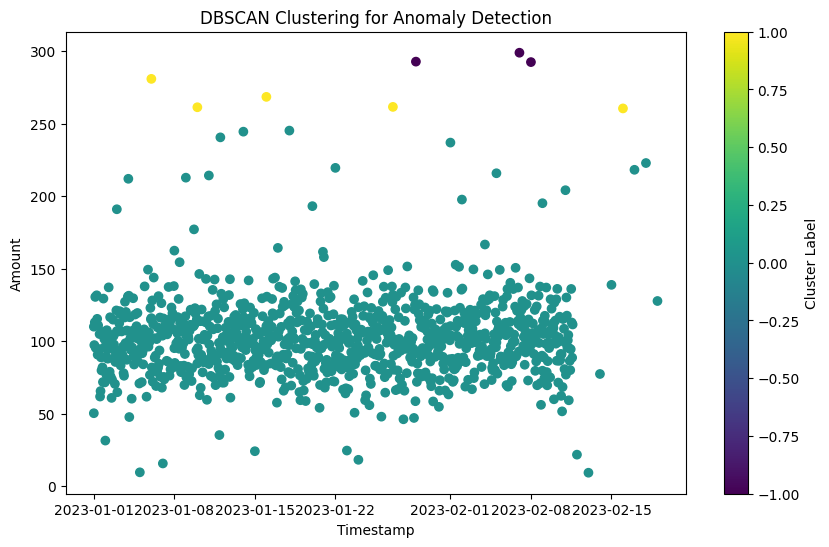

Anomalous Transactions:
          Amount  Timestamp
1028  292.759577 2023-01-29
1037  298.900175 2023-02-07
1038  292.437949 2023-02-08


In [8]:
# Generate sample data (replace this with your actual dataset)
np.random.seed(42)
n_normal = 1000
n_anomalies = 50

normal_data = pd.DataFrame({
    'Amount': np.random.normal(loc=100, scale=20, size=n_normal),
    'Timestamp': pd.date_range(start='2023-01-01', periods=n_normal, freq='h')
})

display(normal_data.head())

anomalous_data = pd.DataFrame({
    'Amount': np.random.uniform(low=0, high=300, size=n_anomalies),
    'Timestamp': pd.date_range(start='2023-01-01', periods=n_anomalies, freq='D')
})

display(anomalous_data.head())

# Concatenate normal and anomalous data
data = pd.concat([normal_data, anomalous_data], ignore_index=True)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Amount']])

# Apply DBSCAN
eps = 0.5  # Epsilon parameter
min_samples = 5  # Minimum number of samples in a neighborhood
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_data)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Timestamp'], data['Amount'], c=clusters, cmap='viridis')
plt.xlabel('Timestamp')
plt.ylabel('Amount')
plt.title('DBSCAN Clustering for Anomaly Detection')
plt.colorbar(label='Cluster Label')
plt.show()

# Identify anomalies
anomalies = data[clusters == -1]
print("Anomalous Transactions:")
print(anomalies)

## Example 2: Evaluate cluster

In this exmaple, we will illustrate the usage of `Silhouette Score`

Silhouette Score: 0.5152164864755174


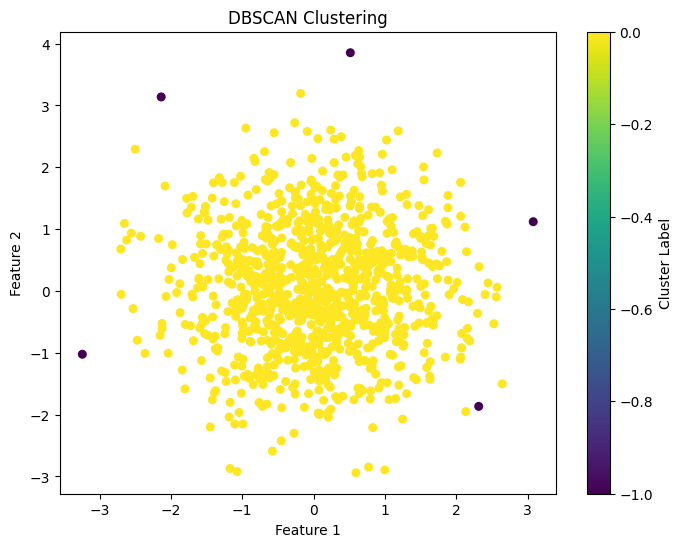

Anomalous Transactions:
[[ 0.51504769  3.85273149]
 [ 2.31465857 -1.86726519]
 [-3.24126734 -1.02438764]
 [ 3.07888081  1.11957491]
 [-2.13567421  3.13774853]]


In [14]:
from sklearn.metrics import silhouette_score

# Generate sample data (replace this with your actual dataset)
np.random.seed(42)
X = np.random.randn(1000, 2)

# Fit DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=8)
clusters = dbscan.fit_predict(X)

# Calculate silhouette score, the higher the better
silhouette = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', s=30)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

# Identify anomalies
anomalies = X[clusters == -1]
print("Anomalous Transactions:")
print(anomalies)

# Auto determine the optimal hyper parameters of DBSCAN

We can use a hyperparameter optimization method called **grid search** to find the optimal values for the `eps` and `min_samples parameters`. Here's an example using grid search with cross-validation:

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV

# used for evaluating the quality of the clustering results
from sklearn.metrics import silhouette_score

# Generate sample data
X, _ = make_moons(n_samples=100, noise=0.1, random_state=42)

# Define the parameter grid to search
param_grid = {
    'eps': [0.1, 0.2, 0.3],
    'min_samples': [2, 3, 4]
}

# Define a function to compute silhouette score for DBSCAN
def compute_silhouette(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) < 2:  # Silhouette score requires at least 2 clusters
        return -1
    else:
        return silhouette_score(X, labels)

# Create a DBSCAN instance
dbscan = DBSCAN()

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(dbscan, param_grid, scoring=compute_silhouette, cv=5)
grid_search.fit(X)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best DBSCAN model
best_dbscan = grid_search.best_estimator_

# Fit the best DBSCAN model to the data
best_dbscan.fit(X)

# Get the cluster labels
labels = best_dbscan.labels_

# Print the cluster labels
print("Cluster labels:", labels)

Best parameters: {'eps': 0.3, 'min_samples': 2}
Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
